In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import auc


#Data Exploration

In [ ]:
notes=pd.read_csv("NOTEEVENTS.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
notes.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')

In [ ]:
notes["TEXT"].values

array(['Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n',
       'Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-

In [ ]:
notes.shape

(2083180, 11)

In [ ]:
notes.describe

<bound method NDFrame.describe of           ROW_ID  ...                                               TEXT
0            174  ...  Admission Date:  [**2151-7-16**]       Dischar...
1            175  ...  Admission Date:  [**2118-6-2**]       Discharg...
2            176  ...  Admission Date:  [**2119-5-4**]              D...
3            177  ...  Admission Date:  [**2124-7-21**]              ...
4            178  ...  Admission Date:  [**2162-3-3**]              D...
...          ...  ...                                                ...
2083175  2070657  ...  NPN\n\n\n#1  Infant remains in RA with O2 sats...
2083176  2070658  ...  Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con...
2083177  2070659  ...  Family Meeting Note\nFamily meeting held with ...
2083178  2070660  ...  NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...
2083179  2070661  ...  NPN 1800\nNursing Addendum:\n[**Known lastname...

[2083180 rows x 11 columns]>

In [ ]:
notes.DESCRIPTION.value_counts()

Report                                             1132519
Nursing Progress Note                               191836
CHEST (PORTABLE AP)                                 169270
Physician Resident Progress Note                     62698
CHEST (PA & LAT)                                     43158
                                                    ...   
EP staff HVMA                                            1
ICU Attending note                                       1
B BREAST CORE BIOSPY UNDER US BILAT                      1
R CT LOWER EXTREMITY MTS WITHOUT CONTRAST RIGHT          1
Physical Therapy. Rehab Services                         1
Name: DESCRIPTION, Length: 3848, dtype: int64

In [ ]:
notes.CATEGORY.value_counts()

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [ ]:
admissions = pd.read_csv("/content/ADMISSIONS.csv")

In [ ]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [ ]:
admissions.HADM_ID.describe

<bound method NDFrame.describe of 0        165315
1        152223
2        124321
3        161859
4        129635
          ...  
58971    191113
58972    101071
58973    122631
58974    170407
58975    190264
Name: HADM_ID, Length: 58976, dtype: int64>

In [ ]:
admissions = admissions.sort_values(['SUBJECT_ID','ADMITTIME'])
admissions = admissions.reset_index(drop = True)


In [ ]:
admissions.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
5,6,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
6,7,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,8,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,NaN,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,2149-11-09 11:13:00,2149-11-09 13:18:00,HEMORRHAGIC CVA,1,1
8,9,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,SHORT TERM HOSPITAL,Medicaid,NaN,UNOBTAINABLE,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,NEWBORN,0,1
9,10,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,NaN,OTHER,MARRIED,WHITE,2178-04-15 20:46:00,2178-04-16 06:53:00,BRAIN MASS,0,1


In [ ]:
admissions.DIAGNOSIS.value_counts()

NEWBORN                                                                     7823
PNEUMONIA                                                                   1566
SEPSIS                                                                      1184
CONGESTIVE HEART FAILURE                                                     928
CORONARY ARTERY DISEASE                                                      840
                                                                            ... 
MULTIPLE FRACTURES,FRONTAL CONTUSIONS                                          1
MORBID OBESITY;INCISIONAL HERNIA;GALLSTONES/SDA                                1
ATRIAL SEPTIC DEFECT\REPAIR ATRIAL SEPTAL DEFECT;MINIMALLY INVASIVE /SDA       1
ADENAL CARCINOMA OF LIVER/SDA                                                  1
SHORTNESS OF BREATH;MITRAL VALVE DISEASE                                       1
Name: DIAGNOSIS, Length: 15691, dtype: int64

In [ ]:
admissions.shape

(58976, 19)

In [ ]:
admissions.loc[admissions.SUBJECT_ID == 100]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
102,103,100,153952,2157-08-10 07:15:00,2157-08-18 19:54:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,WIDOWED,UNKNOWN/NOT SPECIFIED,NaN,NaN,AORTIC INSUFFICIENCY\AORTIC VALVE REPLACEMENT;...,0,1


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 450]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
572,573,450,105452,2155-05-10 18:12:00,2155-05-28 16:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,HISPANIC OR LATINO,2155-05-10 15:02:00,2155-05-10 20:15:00,SEPSIS,0,1
573,574,450,182829,2155-07-24 13:28:00,2155-08-04 07:25:00,2155-08-04 07:25:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,HISPANIC OR LATINO,2155-07-24 11:46:00,2155-07-24 15:23:00,HYPOXIA,1,1


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 234]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
303,304,234,188399,2105-03-02 13:50:00,2105-03-17 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,NON Q MU;UROSEPSIS,0,1
304,305,234,134944,2106-04-04 10:30:00,2106-04-23 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CHEST PAIN/CATH,0,1


In [ ]:
admissions.dtypes

ROW_ID                   int64
SUBJECT_ID               int64
HADM_ID                  int64
ADMITTIME               object
DISCHTIME               object
DEATHTIME               object
ADMISSION_TYPE          object
ADMISSION_LOCATION      object
DISCHARGE_LOCATION      object
INSURANCE               object
LANGUAGE                object
RELIGION                object
MARITAL_STATUS          object
ETHNICITY               object
EDREGTIME               object
EDOUTTIME               object
DIAGNOSIS               object
HOSPITAL_EXPIRE_FLAG     int64
HAS_CHARTEVENTS_DATA     int64
dtype: object

In [ ]:
admissions.groupby(['ADMISSION_TYPE']).size()

ADMISSION_TYPE
ELECTIVE      7706
EMERGENCY    42071
NEWBORN       7863
URGENT        1336
dtype: int64

In [ ]:
#Calculate the days between admittime_succeeding and discharge time which is the days to the readmission/for the next admission
admissions.ADMITTIME = pd.to_datetime(admissions.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
admissions.DISCHTIME = pd.to_datetime(admissions.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
#admissions.ADMITTIME_succeeding = pd.to_datetime(admissions.ADMITTIME_succeeding, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')


In [ ]:
admissions['ADMITTIME_succeeding'] = admissions.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT


In [ ]:
admissions['ADMISSION_TYPE_succeeding'] = admissions.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)


In [ ]:
admissions.loc[admissions.SUBJECT_ID == 234]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding
303,304,234,188399,2105-03-02 13:50:00,2105-03-17 14:20:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,NON Q MU;UROSEPSIS,0,1,2106-04-04 10:30:00,EMERGENCY
304,305,234,134944,2106-04-04 10:30:00,2106-04-23 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Medicare,NaN,PROTESTANT QUAKER,WIDOWED,WHITE,NaN,NaN,CHEST PAIN/CATH,0,1,NaT,NaN


In [ ]:
admissions.dtypes

ROW_ID                                int64
SUBJECT_ID                            int64
HADM_ID                               int64
ADMITTIME                    datetime64[ns]
DISCHTIME                    datetime64[ns]
DEATHTIME                            object
ADMISSION_TYPE                       object
ADMISSION_LOCATION                   object
DISCHARGE_LOCATION                   object
INSURANCE                            object
LANGUAGE                             object
RELIGION                             object
MARITAL_STATUS                       object
ETHNICITY                            object
EDREGTIME                            object
EDOUTTIME                            object
DIAGNOSIS                            object
HOSPITAL_EXPIRE_FLAG                  int64
HAS_CHARTEVENTS_DATA                  int64
ADMITTIME_succeeding         datetime64[ns]
ADMISSION_TYPE_succeeding            object
dtype: object

In [ ]:
admissions.shape

(58976, 21)

In [ ]:
admissions.isnull().sum()

ROW_ID                           0
SUBJECT_ID                       0
HADM_ID                          0
ADMITTIME                        0
DISCHTIME                        0
DEATHTIME                    53122
ADMISSION_TYPE                   0
ADMISSION_LOCATION               0
DISCHARGE_LOCATION               0
INSURANCE                        0
LANGUAGE                     25332
RELIGION                       458
MARITAL_STATUS               10128
ETHNICITY                        0
EDREGTIME                    28099
EDOUTTIME                    28099
DIAGNOSIS                       25
HOSPITAL_EXPIRE_FLAG             0
HAS_CHARTEVENTS_DATA             0
ADMITTIME_succeeding         46520
ADMISSION_TYPE_succeeding    46520
dtype: int64

In [ ]:
admissions['As_D_time'] = (admissions.ADMITTIME_succeeding - admissions.DISCHTIME).dt.total_seconds()/(24*60*60)


In [ ]:
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN,NaN
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1,NaT,NaN,NaN
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,NaT,NaN,NaN
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1,NaT,NaN,NaN
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1,NaT,NaN,NaN


#Textual Data

In [ ]:
notes.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [ ]:
notes.shape

(2083180, 11)

In [ ]:
notes.groupby(['CATEGORY']).size()

CATEGORY
Case Management         967
Consult                  98
Discharge summary     59652
ECG                  209051
Echo                  45794
General                8301
Nursing              223556
Nursing/other        822497
Nutrition              9418
Pharmacy                103
Physician            141624
Radiology            522279
Rehab Services         5431
Respiratory           31739
Social Work            2670
dtype: int64

In [ ]:
disch_summary = notes.loc[notes.CATEGORY == 'Discharge summary']

In [ ]:
disch_summary

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
60411,59608,93924,135672.0,2104-06-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18321**],[**Known fir..."
60412,59609,17782,155710.0,2112-03-31,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 2706**], [**Known fir..."
60413,59621,96333,183951.0,2197-06-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,Name: [**Known lastname 18357**]-[**Known las...
60414,59622,66717,169165.0,2129-08-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam..."


In [ ]:
notes.TEXT[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [ ]:
last_disch_summary = (disch_summary.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()

In [ ]:
last_disch_summary.shape

(52726, 11)

In [ ]:
merged = pd.merge(admissions[['SUBJECT_ID','HADM_ID','ADMISSION_TYPE','ADMITTIME','DISCHTIME','DEATHTIME','ADMITTIME_succeeding','ADMISSION_TYPE_succeeding','As_D_time']],last_disch_summary[['SUBJECT_ID','HADM_ID','TEXT']], on = ['SUBJECT_ID','HADM_ID'], how = 'left')

In [ ]:
adm = pd.merge(admissions[['SUBJECT_ID','HADM_ID','ADMISSION_TYPE','ADMITTIME','DISCHTIME','DIAGNOSIS','DEATHTIME','ADMITTIME_succeeding','ADMISSION_TYPE_succeeding','As_D_time']],last_disch_summary[['SUBJECT_ID','HADM_ID','TEXT']], on = ['SUBJECT_ID','HADM_ID'], how = 'left')


In [ ]:
merged.sample(10)

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT
25453,20857,164605,NEWBORN,2129-03-31 09:25:00,2129-04-04 12:31:00,NaN,NaT,NaN,NaN,NaN
3487,2898,156225,NEWBORN,2127-01-06 07:00:00,2127-01-08 13:16:00,NaN,NaT,NaN,NaN,NaN
49454,69941,185156,EMERGENCY,2161-10-17 21:09:00,2161-10-26 03:15:00,2161-10-26 03:15:00,NaT,NaN,NaN,Admission Date: [**2161-10-17**] ...
55311,88610,159231,ELECTIVE,2123-08-23 07:15:00,2123-08-28 13:35:00,NaN,NaT,NaN,NaN,Admission Date: [**2123-8-23**] ...
41996,46994,166696,EMERGENCY,2104-02-28 13:48:00,2104-03-10 12:44:00,NaN,NaT,NaN,NaN,Admission Date: [**2104-2-28**] ...
21835,17867,129870,NEWBORN,2190-02-15 23:27:00,2190-02-20 15:50:00,NaN,NaT,NaN,NaN,NaN
27204,22289,162416,EMERGENCY,2110-06-04 18:56:00,2110-06-28 14:29:00,NaN,NaT,NaN,NaN,Admission Date: [**2110-6-4**] D...
56292,91613,184996,EMERGENCY,2127-04-17 22:15:00,2127-04-24 15:15:00,NaN,NaT,NaN,NaN,Admission Date: [**2127-4-17**] ...
2363,1962,148663,NEWBORN,2196-09-24 07:50:00,2196-09-26 12:06:00,NaN,NaT,NaN,NaN,NaN
3029,2500,195167,NEWBORN,2191-11-24 16:05:00,2191-11-26 12:35:00,NaN,NaT,NaN,NaN,NaN


In [ ]:
merged.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/merged.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

In [ ]:
adm.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/adm.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

In [ ]:
merged.shape

(58976, 10)

In [ ]:
adm =adm.loc[adm.DIAGNOSIS == 'CONGESTIVE HEART FAILURE']
adm

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DIAGNOSIS,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT
18,21,109451,EMERGENCY,2134-09-11 12:17:00,2134-09-24 16:15:00,CONGESTIVE HEART FAILURE,NaN,2135-01-30 20:50:00,EMERGENCY,128.190972,Admission Date: [**2134-9-11**] ...
38,37,188670,EMERGENCY,2183-08-21 16:48:00,2183-08-26 18:54:00,CONGESTIVE HEART FAILURE,NaN,NaT,NaN,NaN,Admission Date: [**2183-8-21**] Discharge...
42,42,119203,EMERGENCY,2116-04-26 18:58:00,2116-04-30 18:16:00,CONGESTIVE HEART FAILURE,NaN,NaT,NaN,NaN,Admission Date: [**2116-4-29**] Dischar...
217,164,182743,EMERGENCY,2116-12-28 15:32:00,2117-01-16 03:20:00,CONGESTIVE HEART FAILURE,2117-01-16 03:20:00,NaT,NaN,NaN,Admission Date: [**2116-12-28**] ...
388,305,122211,EMERGENCY,2127-06-19 23:49:00,2127-07-16 13:58:00,CONGESTIVE HEART FAILURE,NaN,2129-08-20 18:03:00,EMERGENCY,766.170139,Admission Date: [**2127-6-19**] ...
...,...,...,...,...,...,...,...,...,...,...,...
58770,99361,151032,EMERGENCY,2146-10-23 00:13:00,2146-11-02 14:50:00,CONGESTIVE HEART FAILURE,NaN,2147-05-28 08:21:00,EMERGENCY,206.729861,Admission Date: [**2146-10-23**] ...
58790,99411,108851,EMERGENCY,2134-03-29 20:54:00,2134-04-12 19:47:00,CONGESTIVE HEART FAILURE,NaN,NaT,NaN,NaN,Admission Date: [**2134-3-29**] ...
58872,99650,199859,EMERGENCY,2156-12-25 06:52:00,2157-02-02 15:29:00,CONGESTIVE HEART FAILURE,NaN,NaT,NaN,NaN,Admission Date: [**2156-12-25**] ...
58875,99660,168541,EMERGENCY,2142-04-25 12:04:00,2142-04-29 18:00:00,CONGESTIVE HEART FAILURE,NaN,2144-05-17 18:51:00,EMERGENCY,749.035417,Admission Date: [**2142-4-25**] ...


In [ ]:
adm.As_D_time.min()

0.6923611111111112

[Text(0.5, 0, 'Days Between Readmission')]

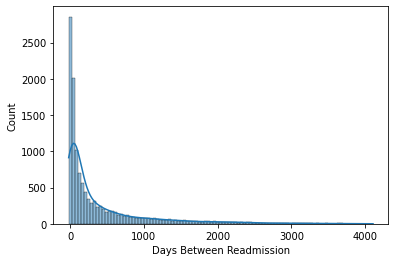

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.histplot(data=merged, x='As_D_time', kde = True)
ax.set(xlabel='Days Between Readmission')


In [ ]:
#Regularization
# for x in (x1,x2,x3...xn)
#new_x = x-mean/(xmax-xmin)

In [ ]:
merged.head(10)


,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT
0,2,163353,NEWBORN,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NaT,NaN,NaN,NaN
1,3,145834,EMERGENCY,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...
2,4,185777,EMERGENCY,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...
3,5,178980,NEWBORN,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NaT,NaN,NaN,NaN
4,6,107064,ELECTIVE,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...
5,7,118037,NEWBORN,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NaT,NaN,NaN,NaN
6,8,159514,NEWBORN,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NaT,NaN,NaN,NaN
7,9,150750,EMERGENCY,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi..."
8,10,184167,NEWBORN,2103-06-28 11:36:00,2103-07-06 12:10:00,NaN,NaT,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...
9,11,194540,EMERGENCY,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2178-4-16**] ...


In [ ]:
merged['OUTPUT_LABEL'] = (merged.As_D_time< 30).astype('int')
merged.head(30)

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
0,2,163353,NEWBORN,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NaT,NaN,NaN,NaN,0
1,3,145834,EMERGENCY,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,NaT,NaN,NaN,Admission Date: [**2101-10-20**] Discharg...,0
2,4,185777,EMERGENCY,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,NaT,NaN,NaN,Admission Date: [**2191-3-16**] Discharge...,0
3,5,178980,NEWBORN,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NaT,NaN,NaN,NaN,0
4,6,107064,ELECTIVE,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2175-5-30**] Dischar...,0
5,7,118037,NEWBORN,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NaT,NaN,NaN,NaN,0
6,8,159514,NEWBORN,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NaT,NaN,NaN,NaN,0
7,9,150750,EMERGENCY,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,NaT,NaN,NaN,"Name: [**Known lastname 10050**], [**Known fi...",0
8,10,184167,NEWBORN,2103-06-28 11:36:00,2103-07-06 12:10:00,NaN,NaT,NaN,NaN,Admission Date: [**2103-6-28**] Dischar...,0
9,11,194540,EMERGENCY,2178-04-16 06:18:00,2178-05-11 19:00:00,NaN,NaT,NaN,NaN,Admission Date: [**2178-4-16**] ...,0


In [ ]:
merged.dropna(subset = ["As_D_time"], inplace=True)

In [ ]:
merged.head()


,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
13,17,194023,ELECTIVE,2134-12-27 07:15:00,2134-12-31 16:05:00,NaN,2135-05-09 14:11:00,EMERGENCY,128.920833,Admission Date: [**2134-12-27**] ...,0
18,21,109451,EMERGENCY,2134-09-11 12:17:00,2134-09-24 16:15:00,NaN,2135-01-30 20:50:00,EMERGENCY,128.190972,Admission Date: [**2134-9-11**] ...,0
21,23,152223,ELECTIVE,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,2157-10-18 19:34:00,EMERGENCY,1501.016667,Admission Date: [**2153-9-3**] D...,0
32,34,115799,EMERGENCY,2186-07-18 16:46:00,2186-07-20 16:00:00,NaN,2191-02-23 05:23:00,EMERGENCY,1678.557639,NaN,0
35,36,182104,EMERGENCY,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,2131-05-12 19:49:00,EMERGENCY,4.242361,Admission Date: [**2131-4-30**] ...,1


In [ ]:
merged.shape

(12456, 11)

In [ ]:
merged = merged.drop("DEATHTIME",1)
merged=merged[merged['TEXT'].notna()]
merged.head(50)

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
13,17,194023,ELECTIVE,2134-12-27 07:15:00,2134-12-31 16:05:00,2135-05-09 14:11:00,EMERGENCY,128.920833,Admission Date: [**2134-12-27**] ...,0
18,21,109451,EMERGENCY,2134-09-11 12:17:00,2134-09-24 16:15:00,2135-01-30 20:50:00,EMERGENCY,128.190972,Admission Date: [**2134-9-11**] ...,0
21,23,152223,ELECTIVE,2153-09-03 07:15:00,2153-09-08 19:10:00,2157-10-18 19:34:00,EMERGENCY,1501.016667,Admission Date: [**2153-9-3**] D...,0
35,36,182104,EMERGENCY,2131-04-30 07:15:00,2131-05-08 14:00:00,2131-05-12 19:49:00,EMERGENCY,4.242361,Admission Date: [**2131-4-30**] ...,1
36,36,122659,EMERGENCY,2131-05-12 19:49:00,2131-05-25 13:30:00,2134-05-10 11:30:00,ELECTIVE,1080.916667,Admission Date: [**2131-5-12**] ...,0
59,61,176332,ELECTIVE,2118-06-17 14:40:00,2118-07-20 12:30:00,2119-01-04 18:12:00,EMERGENCY,168.237500,Admission Date: [**2118-6-17**] ...,0
66,67,186474,URGENT,2155-02-25 12:45:00,2155-03-06 15:00:00,2157-12-02 00:45:00,EMERGENCY,1001.406250,Admission Date: [**2155-2-25**] Dischar...,0
68,68,170467,EMERGENCY,2173-12-15 16:16:00,2174-01-03 18:30:00,2174-01-04 22:21:00,EMERGENCY,1.160417,Admission Date: [**2173-12-15**] ...,1
84,84,120969,ELECTIVE,2196-02-02 07:15:00,2196-02-04 17:48:00,2196-04-14 04:02:00,EMERGENCY,69.426389,Admission Date: [**2196-2-2**] Discharge ...,0
86,85,116630,EMERGENCY,2162-03-02 14:04:00,2162-03-10 13:15:00,2167-07-25 18:49:00,EMERGENCY,1963.231944,Admission Date: [**2162-3-2**] D...,0


In [ ]:
merged=merged[merged['TEXT'].notna()]

In [ ]:
merged.shape

(11915, 10)

0    8740
1    3175
Name: OUTPUT_LABEL, dtype: int64


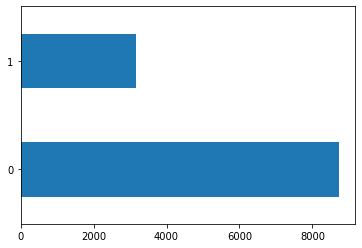

In [ ]:
import seaborn as sn
def classFreqPlot(X):
  classFreq = X["OUTPUT_LABEL"].value_counts()
  print(classFreq)
  classFreq.plot.barh()
classFreqPlot(merged)

In [ ]:
def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT = df.TEXT.str.replace('\n',' ')
    df.TEXT = df.TEXT.str.replace('\r',' ')
    return df
# preprocess the text to deal with known issues
df = preprocess_text(merged)


In [ ]:
arr=np.asarray(df)
arr[0][8]


"Admission Date:  [**2134-12-27**]              Discharge Date:   [**2134-12-31**]  Date of Birth:  [**2087-7-14**]             Sex:   F  Service: CARDIOTHORACIC  Allergies: Bactrim / Ampicillin / Remeron  Attending:[**First Name3 (LF) 1283**] Chief Complaint: History of stroke  Major Surgical or Invasive Procedure: [**2134-12-27**] Minimally invasive closure of patent foramen ovale   History of Present Illness: Mrs. [**Known lastname 11679**] is a 47 year old female who suffered a cerebellar stroke in [**2134-3-9**]. Workup at that time revealed a patent foramen ovale. She is currently followed by Dr. [**Last Name (STitle) 1693**](neurologist) from the [**Hospital1 18**]. Full hypercoagulability workup was unremarkable. Since [**Month (only) 956**], she has had no other neurological events. In preperation for surgical intervention, she underwent cardiac catheterization in [**Month (only) **] which showed normal coronary arteries and normal left ventricular function.  Past Medical Hist

In [ ]:
df

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,ADMITTIME_succeeding,ADMISSION_TYPE_succeeding,As_D_time,TEXT,OUTPUT_LABEL
13,17,194023,ELECTIVE,2134-12-27 07:15:00,2134-12-31 16:05:00,2135-05-09 14:11:00,EMERGENCY,128.920833,Admission Date: [**2134-12-27**] ...,0
18,21,109451,EMERGENCY,2134-09-11 12:17:00,2134-09-24 16:15:00,2135-01-30 20:50:00,EMERGENCY,128.190972,Admission Date: [**2134-9-11**] ...,0
21,23,152223,ELECTIVE,2153-09-03 07:15:00,2153-09-08 19:10:00,2157-10-18 19:34:00,EMERGENCY,1501.016667,Admission Date: [**2153-9-3**] D...,0
35,36,182104,EMERGENCY,2131-04-30 07:15:00,2131-05-08 14:00:00,2131-05-12 19:49:00,EMERGENCY,4.242361,Admission Date: [**2131-4-30**] ...,1
36,36,122659,EMERGENCY,2131-05-12 19:49:00,2131-05-25 13:30:00,2134-05-10 11:30:00,ELECTIVE,1080.916667,Admission Date: [**2131-5-12**] ...,0
...,...,...,...,...,...,...,...,...,...,...
58939,99883,150755,EMERGENCY,2131-12-24 17:41:00,2131-12-27 17:45:00,2132-09-15 00:36:00,ELECTIVE,262.285417,Admission Date: [**2131-12-24**] ...,0
58943,99897,162913,EMERGENCY,2181-08-06 02:22:00,2181-08-07 16:30:00,2182-07-03 19:50:00,EMERGENCY,330.138889,Admission Date: [**2181-8-6**] D...,0
58951,99923,164914,EMERGENCY,2201-02-23 20:42:00,2201-03-03 16:00:00,2201-05-15 13:12:00,EMERGENCY,72.883333,Admission Date: [**2201-2-23**] ...,0
58967,99982,151454,EMERGENCY,2156-11-28 11:56:00,2156-12-08 13:45:00,2157-01-05 17:27:00,EMERGENCY,28.154167,Admission Date: [**2156-11-28**] ...,1


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name','is','patient','s','he','at','as','or','one','she','his','her','am','were','you','pt','pm','by','be','had','your','this','date', 'from','there','an','that','p','are','have','has','h','but','o','namepattern','which','every','also']


In [ ]:
def remove_stopwords(text):
  l=[]
  for i in text.split():
    if i not in my_stop_words:
      l.append(i)
  return " ".join(l)

In [ ]:
import re

In [ ]:
import string
from nltk import word_tokenize

def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    text= re.sub('[^a-zA-Z0-9 \n\.]','', text)
    text=remove_stopwords(text)
    return text


In [ ]:
X=df.TEXT.values

In [ ]:
X=df.TEXT.values
for i in range(len(X)):
  X[i]=tokenizer_better(X[i])

In [ ]:
y=df.OUTPUT_LABEL.values


In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
X

array(['admission discharge birth sex f service cardiothoracic allergies bactrim ampicillin remeron attending first lf chief complaint history stroke major surgical invasive procedure minimally invasive closure patent foramen ovale history present illness mrs known lastname year old female who suffered cerebellar stroke workup time revealed patent foramen ovale currently followed dr last stitle neurologist hospital full hypercoagulability workup unremarkable since month only no other neurological events preperation surgical intervention underwent cardiac catheterization month only showed normal coronary arteries normal left ventricular function past medical history patent foramen ovale history stroke tia depression anxiety borderline hyperlipidemia herniation cervical discs patella femoral syndrome bunionectomies social history denies tobacco admits occasional etoh employee hospital neuro pysch department married two children denies ivda recreational drugs family history father underwe

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer_better, 
                       stop_words = my_stop_words)

vect.fit(df.TEXT.values)

In [ ]:
X=vect.transform(df.TEXT.values)

KeyboardInterrupt: ignored

In [ ]:
y


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier




In [ ]:
lr=LogisticRegression( random_state = 42,max_iter=1000)
lr.fit(X,y)
y_lr=lr.predict_proba(X)

rf=RandomForestClassifier()
rf.fit(X,y)
y_rf=rf.predict_proba(X)


s=svm.SVC()
s.fit(X,y)





In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import sklearn.metrics as metrics
svc_disp = metrics.plot_roc_curve(lr, X, y)
rfc_disp = metrics.plot_roc_curve(s, X, y)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()

In [ ]:
y_pred=clf.predict_proba(X)[:,1]

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
fpr, tpr, thresholds = roc_curve(y,y_pred)
roc_auc =auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
'''y_pred=clf.predict_proba(X)[:,1]'''

In [ ]:
'''y_pred'''

In [ ]:
'''counts = pd.DataFrame(matrix.toarray(),
                  columns=vect.get_feature_names())

counts'''


In [ ]:
my_sum_serie=counts.sum() #get a ordered pandas Series
my_sum_serie
d=my_sum_serie.to_dict()''


In [ ]:

'''sorted(A, key=A.get, reverse=True)[:5]'''

In [ ]:
'''type(D)'''

In [ ]:
'''merged.head()'''

In [ ]:
'import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(30, 10), dpi=80)
D=sorted(d, key=d.get, reverse=True)[:20]
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.bar(D, [d[i] for i in D],width=1.0, facecolor='black', edgecolor='white')


In [ ]:
# adTyp=merged.groupby(['ADMISSION_TYPE']).size()
# col=merged.ADMISSION_TYPE.unique()
# col=col.tolist()
# col
# adTyp=adTyp.tolist()
# plt.bar(col,adTyp)

In [ ]:
# adTyp=merged.groupby(['ADMISSION_TYPE_succeeding']).size()
# col=merged.ADMISSION_TYPE.unique()
# col=col.tolist()
# col
# adTyp=adTyp.tolist()
# plt.bar(col,adTyp)

In [ ]:
import math

In [ ]:
# daysgap=[]
# daysgap.append((merged.As_D_time< 30).astype('int').sum())
# daysgap.append((merged.As_D_time< 90).astype('int').sum())
# daysgap.append((merged.As_D_time< 180).astype('int').sum())
# daysgap.append((merged.As_D_time< 365).astype('int').sum())
# daysgap.append((merged.As_D_time<math.inf).astype('int').sum())

In [ ]:
# daysgap

In [ ]:
# plt.bar(["30","90","180","365","any time"],daysgap,color="c")
# plt.xlabel("readmission time")
# plt.ylabel("number of patients")

 #< 30
 #> 30  <90
 #> 90 ++++++

In [ ]:
notes.CATEGORY.count()

In [ ]:

# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(11.7,8.27)})

# plt.tight_layout()
# ax = sns.countplot(x="CATEGORY", data=notes)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
!pip install transformers
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

     |████████████████████████████████| 3.3 MB 4.8 MB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
     |████████████████████████████████| 61 kB 502 kB/s 
     |████████████████████████████████| 3.3 MB 37.6 MB/s 
     |████████████████████████████████| 895 kB 42.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", return_dict=False)

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
X.shape

In [ ]:
import pylab as pl

NameError: ignored

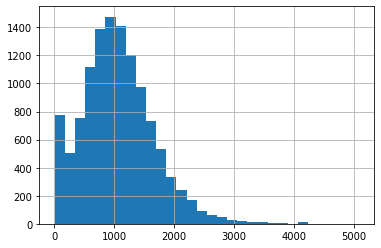

In [ ]:
seq_len = [len(i.split()) for i in X]

pd.Series(seq_len).hist(bins = 30)
pl.xlabel("Number of Words")
pl.ylabel("Number of notes")

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(X, y, 
                                                                    random_state=2018, 
                                                                    test_size=0.4, 
                                                                    stratify=y)


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)


In [ ]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 50,
    pad_to_max_length=True,
    truncation=True
)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 50,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 50,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(model)

# push the model to GPU
model = model.to(device)

In [ ]:

# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight ='balanced',classes = np.unique(train_labels),y= train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.68163616 1.87637795]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 5

In [ ]:
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
 
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.687
Validation Loss: 0.692

 Epoch 2 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.681
Validation Loss: 0.688

 Epoch 3 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.668
Validation Loss: 0.682

 Epoch 4 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.651
Validation Loss: 0.685

 Epoch 5 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.612
Val

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.77      0.54      0.64      1748
           1       0.31      0.57      0.40       635

    accuracy                           0.55      2383
   macro avg       0.54      0.55      0.52      2383
weighted avg       0.65      0.55      0.57      2383



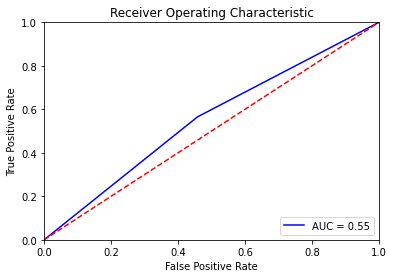

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y,preds)
roc_auc =auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()